In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# We will now load the data set

data = pd.read_csv("../data/GenZ_DatingApp_Data.csv")

# Summary of numerical variables
print(data.describe())

          User_ID         Age  Satisfaction
count  500.000000  500.000000    500.000000
mean   250.500000   21.582000      2.906000
std    144.481833    2.259532      1.441291
min      1.000000   18.000000      1.000000
25%    125.750000   20.000000      2.000000
50%    250.500000   22.000000      3.000000
75%    375.250000   24.000000      4.000000
max    500.000000   25.000000      5.000000


In [11]:
# Summary of categorical variables
print(data.describe(include="object"))

        Gender Location Education Occupation Primary_App Secondary_Apps  \
count      500      500       500        500         393            386   
unique       3        7         3          5           4              4   
top     Female   Mumbai  Graduate    Student     OkCupid          Hinge   
freq       176       82       169        106         118            103   

       Usage_Frequency Daily_Usage_Time Reason_for_Using  \
count              500              500              500   
unique               3                5                4   
top              Daily        1.5 hours    Casual Dating   
freq               181              109              138   

                     Challenges         Desired_Features  \
count                       383                      500   
unique                        3                        5   
top     Lack of Genuine Matches  Location-Based Matching   
freq                        135                      111   

       Preferred_Commu

In [14]:
#Checking the data types
print(data.dtypes)

# Converting the object data types to Categorys
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')

# Converting the Satisfication column to category

data["Satisfaction"] = data["Satisfaction"].astype('category')

User_ID                       int64
Age                           int64
Gender                     category
Location                   category
Education                  category
Occupation                 category
Primary_App                category
Secondary_Apps             category
Usage_Frequency            category
Daily_Usage_Time           category
Reason_for_Using           category
Satisfaction               category
Challenges                 category
Desired_Features           category
Preferred_Communication    category
Partner_Priorities         category
dtype: object


In [27]:
# Compute correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Display correlation values
print(correlation_matrix)

# Based on this, the correlation matrix isn't really efficeint because the data is not numerical

          User_ID       Age
User_ID  1.000000  0.075403
Age      0.075403  1.000000


In [31]:
#  Pivot Tables & Groupby Aggregations: Summarize Data Based on Gender, Age, and Location

# Average Daily Usage Time by Gender (Mode)
avg_usage_by_gender = data.groupby("Gender")["Daily_Usage_Time"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(avg_usage_by_gender)

# Count of Users by Gender and Location
user_distribution = data.groupby(["Gender", "Location"])["User_ID"].count().unstack()
print(user_distribution)

# Average Age per Gender & Location
avg_age = data.groupby(["Gender", "Location"])["Age"].mean().unstack()
print(avg_age)

Gender
Female           2 hours
Male             2 hours
Non-binary    30 minutes
Name: Daily_Usage_Time, dtype: category
Categories (5, object): ['1 hour', '1.5 hours', '2 hours', '3 hours', '30 minutes']
Location    Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai  Pune
Gender                                                                 
Female             17       23     30         18       26      31    31
Male               31       17     26         21       27      33    16
Non-binary         21       26     20         25       23      18    20
Location    Bangalore    Chennai      Delhi  Hyderabad    Kolkata     Mumbai  \
Gender                                                                         
Female      20.882353  20.304348  22.333333  21.111111  21.423077  21.000000   
Male        21.903226  21.882353  21.538462  21.952381  21.518519  21.363636   
Non-binary  21.809524  21.730769  22.600000  21.840000  20.913043  21.611111   

Location         Pune  
Gender   

C:\Users\eengj\AppData\Local\Temp\ipykernel_11184\2778422294.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage_by_gender = data.groupby("Gender")["Daily_Usage_Time"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
C:\Users\eengj\AppData\Local\Temp\ipykernel_11184\2778422294.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_distribution = data.groupby(["Gender", "Location"])["User_ID"].count().unstack()
C:\Users\eengj\AppData\Local\Temp\ipykernel_11184\2778422294.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version 

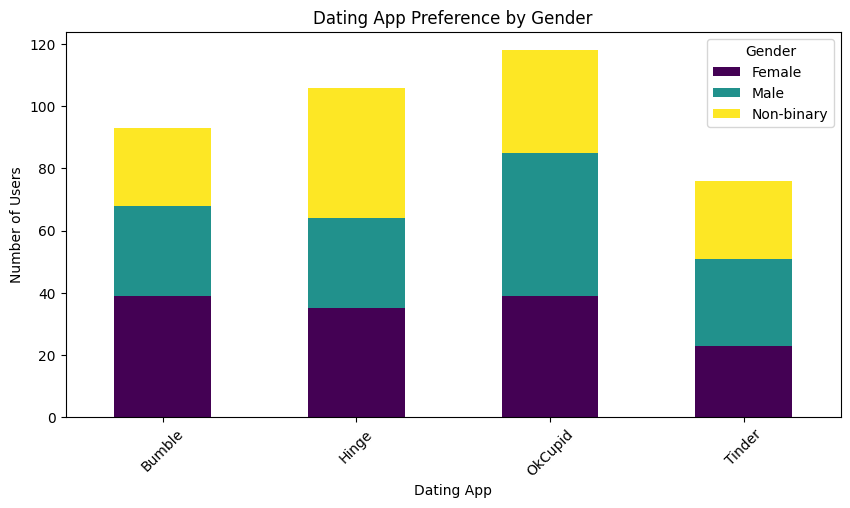

In [42]:
#1. Does gender influences data app preferences?

# Count dating app usage by gender
gender_app_counts = pd.crosstab(data["Primary_App"], data["Gender"])

# Plot stacked bar chart
gender_app_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 5))

plt.xlabel("Dating App")
plt.ylabel("Number of Users")
plt.title("Dating App Preference by Gender")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# From the bar chart, Yes it could be seen that gender influences the data app choices.

C:\Users\eengj\AppData\Local\Temp\ipykernel_11184\1948131667.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_app_usage = data.groupby("Gender")["Multiple_Apps"].sum()


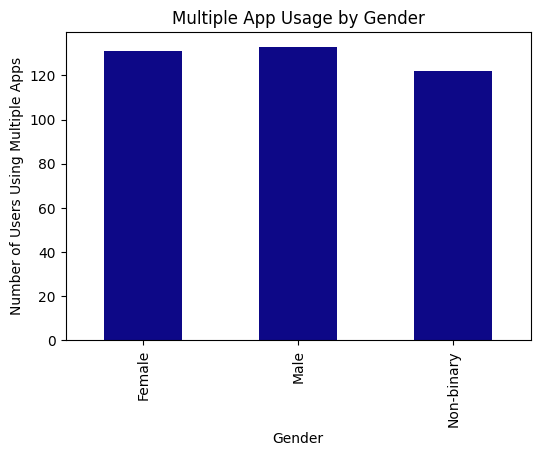

In [43]:

# 2. Are people using multiple dating apps simultaneously?


# Count of users who use multiple apps
data["Multiple_Apps"] = data["Secondary_Apps"].apply(lambda x: 1 if pd.notnull(x) else 0)

# Group by Gender and count users using multiple apps
multi_app_usage = data.groupby("Gender")["Multiple_Apps"].sum()
multi_app_usage.plot(kind="bar", colormap="plasma", figsize=(6, 4))

plt.xlabel("Gender")
plt.ylabel("Number of Users Using Multiple Apps")
plt.title("Multiple App Usage by Gender")
plt.show()


In [ ]:
# Ans: Yes, people are using multiple dating apps simultaneously. This could be seen from the graph above

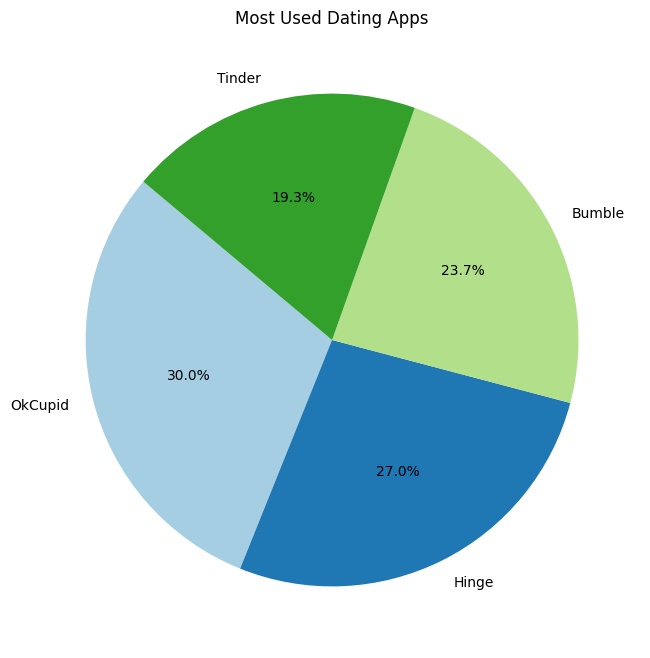

In [44]:
# 3. Which age group is most active on dating apps? 

# Count occurrences of each primary dating app
app_counts = data["Primary_App"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(app_counts, labels=app_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

plt.title("Most Used Dating Apps")
plt.show()



In [ ]:
# From the pie chart above, it could be seen that OkCupid is the most used dating app. It is used by 30% of the users.

In [ ]:
# 4. Do people in urban vs. rural areas show different usage patterns?